In [1]:
import matplotlib.pyplot as plt
import numpy as np


In [41]:
# G-H Filter
def g_h_filter(data, pred, gain_rate, g_scale, h_scale, time_step):
    """
    Performs g-h filter on 1 state variable with a fixed g and h.

    'data' contains the data to be filtered.
    'pred' is the initial value for our state variable
    'gain_rate' is the initial change rate for our state variable
    'g_scale' is the g-h's g scale factor
    'h_scale' is the g-h's h scale factor
    'time_step' is the length of the time step 
    """
    estimates = [] # initial guess
    predictions = []

    for actual in data:
        # prediction step
        pred = pred + gain_rate*time_step
        predictions.append(pred)
    
        # update step    
        residual = actual - pred
    
        gain_rate = gain_rate + h_scale   * (residual/time_step)
        pred      = pred    + g_scale * residual
        
        estimates.append(pred)
        
    return np.asarray(predictions),np.asarray(estimates)

# Generate Noise with noise factor
def gen_data(x0, dx, count, noise_factor):
    return [x0 + dx*i + np.random.randn()*noise_factor for i in range(count)]

# Generate white Noise with 2nd order increase and noise factor
def gen_data_Accel(x0, dx, count, accel, noise_factor):
    data = []
    for i in range(count):
        data.append(x0 + dx*i + np.random.randn()*noise_factor)
        dx += accel
    return data

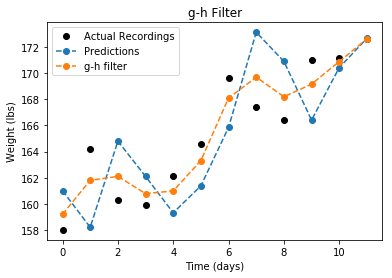

G-H Filter does a better job of correcting the model to the data.
	prediction error:  177.241211552
	g-h Filter error:  28.3585938484
G & H parameters can be updated dynamically


In [43]:
# Create synthetic data and run g-h filter
weights = [158.0, 164.2, 160.3, 159.9, 162.1, 164.6, 
           169.6, 167.4, 166.4, 171.0, 171.2, 172.6]
predictions,ghfilter = g_h_filter(data=weights, pred=160, gain_rate=1, g_scale=6/10, h_scale=2/3, time_step=1)
plt.plot(weights,'ko')
plt.plot(predictions,'--o')
plt.plot(ghfilter,'--o')
plt.legend(['Actual Recordings','Predictions','g-h filter'])
plt.ylabel('Weight (lbs)')
plt.xlabel('Time (days)')
plt.title('g-h Filter')
plt.show()
# Calculate LSerror
predError = np.sum((weights-predictions)**2)
ghError = np.sum((weights-ghfilter)**2)
print('G-H Filter does a better job of correcting the model to the data.')
print("\tprediction error: ",predError)
print("\tg-h Filter error: ",ghError)
print('G & H parameters can be updated dynamically')


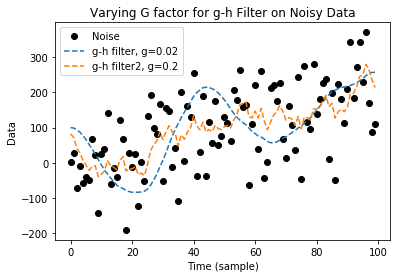

* NOTE: If you expect data to be noisy, reduce G
Adding too much weight to the g-scale will cause the gh-filter to veer from the model
 and instead be heavily influenced by the data


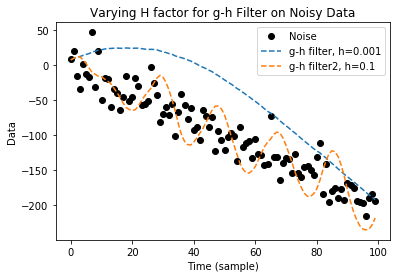

* NOTE: If you expect undramatic (non-quick) changes in data, reduce H
Adding too much weight to the H-scale could cause ringing
If it is too small the filter will not converge quickly enough.


In [70]:
# Adjusting G
zs   = gen_data(x0=5., dx=2., count=100, noise_factor=100)
_,gh_filtera = g_h_filter(data=zs, pred=100, gain_rate=1, g_scale=.02, h_scale=.02, time_step=2)
_,gh_filterb = g_h_filter(data=zs, pred=100, gain_rate=1, g_scale=.2, h_scale=.02, time_step=2)

plt.plot(zs,'ko')
plt.plot(gh_filtera,'--')
plt.plot(gh_filterb,'--')

plt.legend(['Noise','g-h filter, g=0.02','g-h filter2, g=0.2'])
plt.ylabel('Data')
plt.xlabel('Time (sample)')
plt.title('Varying G factor for g-h Filter on Noisy Data')
plt.show()
print("* NOTE: If you expect data to be noisy, reduce G")
print("Adding too much weight to the g-scale will cause the gh-filter to veer from the model\n and instead be heavily influenced by the data")
# Adjusting H
xdata   = gen_data(x0=0., dx=-2., count=100, noise_factor=20)
_,gh_filtera = g_h_filter(data=xdata, pred=5, gain_rate=1, g_scale=.02, h_scale=.001, time_step=2)
_,gh_filterb = g_h_filter(data=xdata, pred=5, gain_rate=1, g_scale=.02, h_scale=.1, time_step=2)

plt.plot(xdata,'ko')
plt.plot(gh_filtera,'--')
plt.plot(gh_filterb,'--')

plt.legend(['Noise','g-h filter, h=0.001','g-h filter2, h=0.1'])
plt.ylabel('Data')
plt.xlabel('Time (sample)')
plt.title('Varying H factor for g-h Filter on Noisy Data')
plt.show()
print("* NOTE: If you expect undramatic (non-quick) changes in data, reduce H")
print("Adding too much weight to the H-scale could cause ringing\nIf it is too small the filter will not converge quickly enough.")

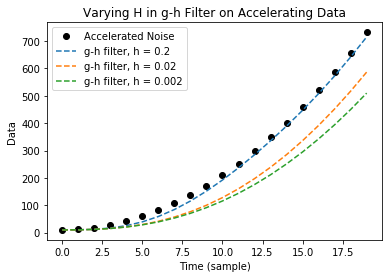

NOTE: If you expect slow , reduce G
Adding too much weight to the H-scale could cause ringing
If it is too small the filter will not converge quickly enough.


In [67]:
zs2 = gen_data_Accel(x0=10., dx=0., count=20, noise_factor=0, accel=2.)
_,gh_filter2 = g_h_filter(data=zs2, pred=10, gain_rate=0, g_scale=.2, h_scale=.2, time_step=1)
_,gh_filter3 = g_h_filter(data=zs2, pred=10, gain_rate=0, g_scale=.2, h_scale=.02, time_step=1)
_,gh_filter4 = g_h_filter(data=zs2, pred=10, gain_rate=0, g_scale=.2, h_scale=.002, time_step=1)


plt.plot(zs2,'ko')
plt.plot(gh_filter2,'--')
plt.plot(gh_filter3,'--')
plt.plot(gh_filter4,'--')

plt.legend(['Accelerated Noise','g-h filter, h = 0.2','g-h filter, h = 0.02','g-h filter, h = 0.002'])
plt.ylabel('Data')
plt.xlabel('Time (sample)')
plt.title('Varying H in g-h Filter on Accelerating Data')
plt.show()